In [1]:
import sys
sys.path.append('../../../lib')
from tqdm import tqdm
from scipy.signal import fftconvolve
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_detection_methods import trajectory_gauss, trajectory_mean, trajectory_corr, fit_gaussian, find_ideal_R,most_common_value
from movie_processing import movie_to_array, clean_problem_pixels
from Powerspectra import powerspectrum, fit_power_spectrum, plot_power_spectra, fast_analytical_noisy_powerspectrum
#from pipython.datarectools import getservotime
#core.set_exposure(0.5)##sets the cameras exposure time for snapshots to half a milisecond

In [80]:
pip install -r ../../../requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install git+https://github.com/wusche1/SpectralMechanicsAnalysis.git

  Cloning https://github.com/wusche1/SpectralMechanicsAnalysis.git to c:\users\jschulz\appdata\local\temp\pip-req-build-x25cmhmm
  Resolved https://github.com/wusche1/SpectralMechanicsAnalysis.git to commit 3f37f0cd586ec35a72978dc4e948657458efd435
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/wusche1/SpectralMechanicsAnalysis.git 'C:\Users\jschulz\AppData\Local\Temp\pip-req-build-x25cmhmm'


In [6]:
from SpectralMechanicsAnalysis import mean_back_realxation, mean_back_relaxation_multiple_trajectories, mean_back_relaxation_multiple_trajectories_with_timestamps, mean_back_relaxation_multiple_trajectories_with_timestamps

In [82]:
def trajectory_folders_from_datapath(datapath):
    list_of_subfolders = [f.path for f in os.scandir(datapath) if f.is_dir()]
    return [os.path.join(datapath,subfolder) for subfolder in list_of_subfolders]

data_path = r'\\134.76.13.158\betzlab\Julian\cell_beats\19_02_2024\Sample1'
trajectory_folders = trajectory_folders_from_datapath(data_path)

In [83]:
tra_corr_1 = np.load(os.path.join(trajectory_folders[0],'tra_corr.npy'))
tra_corr_2 = np.load(os.path.join(trajectory_folders[1],'tra_corr.npy'))
tra_mean_1 = np.load(os.path.join(trajectory_folders[0],'tra_mean.npy'))
tra_mean_2 = np.load(os.path.join(trajectory_folders[1],'tra_mean.npy'))

In [84]:
dt = 0.01
x_data = tra_mean_2[:,0]
t_data = np.arange(0, len(x_data)*dt, dt)
tra_corr_2_dataset_x = Data(t_data, x_data, log_weighted = True) 

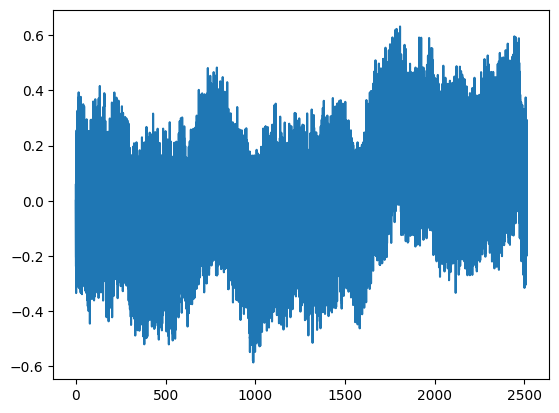

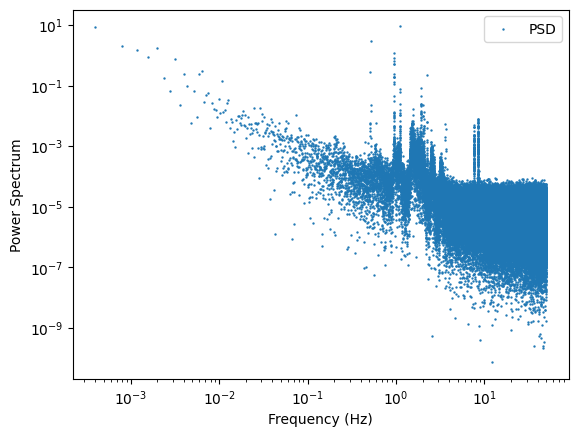

In [85]:
plt.plot(t_data, x_data)
plt.show()
tra_corr_2_dataset_x.plot_psd()

In [86]:
tra_corr_2_dataset_x.bayesian_update()

c:\Users\jschulz\Desktop\Git_file\mbr_relevant_code\.venv\Lib\site-packages\SpectralMechanicsAnalysis\analyze_data.py:36: RuntimeWarning: invalid value encountered in log
  Loss = y_data / y_model + np.log(y_model)


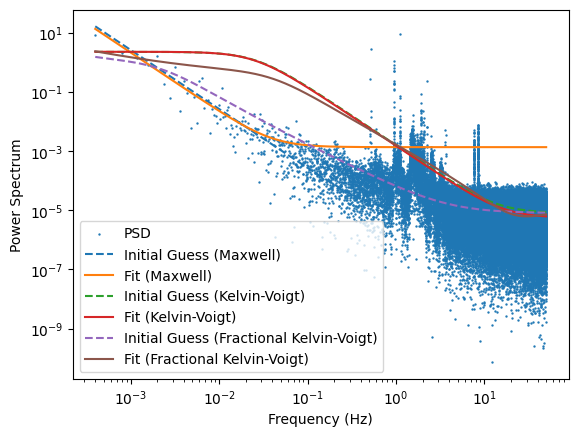

In [87]:
tra_corr_2_dataset_x.plot_psd()


In [88]:
tra_corr_2_dataset_x.peaks = []
tra_corr_2_dataset_x.max_peak_percentage = 0.8
tra_corr_2_dataset_x.find_peaks(max_iter=5)

In [89]:
tra_corr_2_dataset_x.create_reconstructed_data()

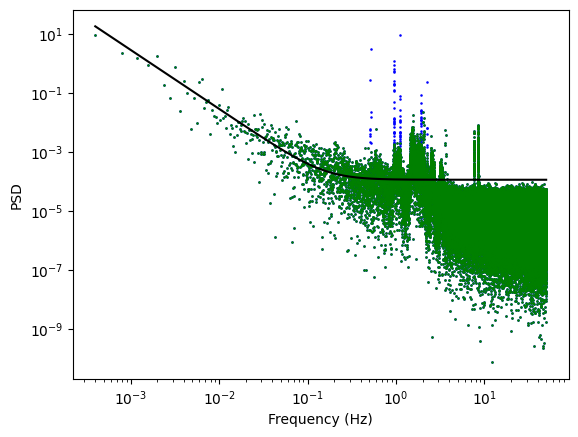

In [90]:
frequencies = tra_corr_2_dataset_x.frequencies
PSD = tra_corr_2_dataset_x.PSD
plt.scatter(frequencies, PSD, s=.7,c='b')
plt.scatter(frequencies, tra_corr_2_dataset_x.reconstructed_PSD, c='g', s=.7)
plt.plot(frequencies, tra_corr_2_dataset_x.fit_function(frequencies, tra_corr_2_dataset_x.fit_params), c='k')


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()

In [44]:
tra_corr_2_dataset_x.reconstructed_x

array([ 0.08546099,  0.05104453,  0.02946838, ..., -1.18659277,
       -1.18781556, -1.18838188])

In [59]:
dt = dt
Tau = dt
T_MBR = 10
multiplier = 1

mbr = mean_back_realxation(dt,tra_mean_2[:,1], Tau, T_MBR, multiplier = multiplier)

100%|██████████| 77293/77293 [00:00<00:00, 215411.44it/s]


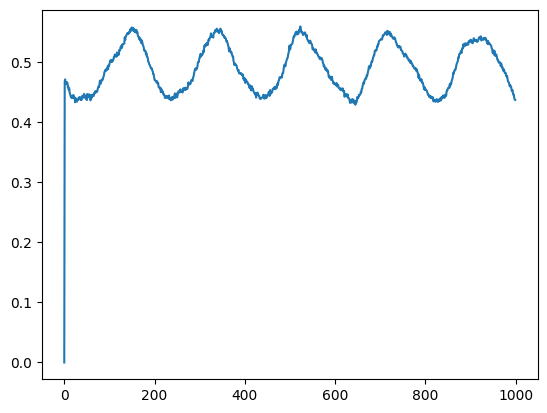

In [60]:
plt.plot(mbr)

In [97]:
np.min(PSD[:0])

ValueError: zero-size array to reduction operation minimum which has no identity

In [99]:
PSD
min_PSD_up_to = np.minimum.accumulate(PSD)

In [107]:
p = 0.01
def calculate_x_p(p,x_l):
    n = np.arange(1, len(x_l)+1)
    return (2*(p)**3-1)*x_l

x_p = calculate_x_p(p,min_PSD_up_to)

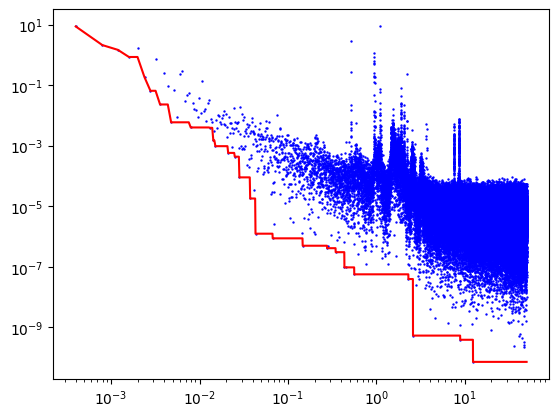

In [108]:
plt.scatter(frequencies,PSD, s=.5, c='b')
plt.plot(frequencies, min_PSD_up_to, c='r')
plt.plot(frequencies, x_p, c='g')
plt.xscale('log')
plt.yscale('log')